In [1]:
from sklearn.ensemble import RandomForestClassifier
from impreciseshap import ImpreciseShap
from sklearn.metrics import accuracy_score
import pandas as pd

In [2]:
df = pd.read_csv("./data/clust4_1000_250.csv")
df.head()

,x,y,class,is_test
0,3.350270,1.743714,2,True
1,1.774558,1.769567,0,True
2,3.218869,1.223416,2,False
3,3.527773,3.876079,3,False
4,2.008688,3.151379,1,False


In [3]:
df_train = df[df['is_test'] == False]
df_test = df[df['is_test'] == True]
X_train, y_train = df_train[['x', 'y']], df_train[['class']]
X_test, y_test = df_test[['x', 'y']], df_test[['class']]

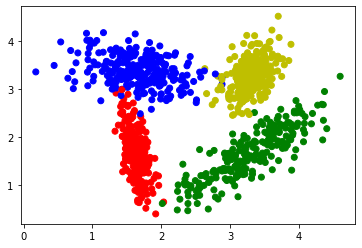

In [4]:
import matplotlib.pyplot as plt
color_dict = {0: "r", 1: "b", 2: "g", 3: "y"}
colors = [color_dict[i] for i in df_train['class']]
plt.scatter(x=df_train['x'], y=df_train['y'], c=colors)

In [5]:
model = RandomForestClassifier(max_depth=8, max_features=2, random_state=40).fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Accuracy = {accuracy_score(y_test, y_pred)*100}%")

Accuracy = 97.2%


<ipython-input-5-77d890f662b1>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RandomForestClassifier(max_depth=8, max_features=2, random_state=40).fit(X_train, y_train)


# Simple example with intervals

In [6]:
points_to_explain = pd.DataFrame({'x':[1.0, 2.0], 'y':[1.0, 2.0]})
explainer = ImpreciseShap(model=model.predict_proba, masker=X_train, eps=0.15)
result_dataframe = explainer.calculate_shapley_values(points_to_explain)

100%|██████████| 2/2 [00:01<00:00,  1.75it/s]


In [7]:
result_dataframe

,x,y,phi(x)_l,phi(x)_u,phi(x)_len,phi(y)_l,phi(y)_u,phi(y)_len
0,1.0,1.0,0.118349,0.493349,0.375000,0.071072,0.446072,0.375000
1,2.0,2.0,-0.159478,0.223988,0.383466,-0.074448,0.390393,0.464841


# Example with different epsilon values

In [8]:
from impreciseshap.visualization import get_df_for_eps
eps_arr = [1e-3, 1e-2, 5e-2, 0.1, 0.15]
example_with_eps = get_df_for_eps(model, X_train, points_to_explain, eps_arr)
display(example_with_eps)

100%|██████████| 2/2 [00:01<00:00,  1.17it/s]


,x,y,phi(x)_l,phi(x)_u,phi(x)_len,phi(y)_l,phi(y)_u,phi(y)_len,eps
0,1.0,1.0,0.402036,0.404536,0.002500,0.346472,0.348972,0.002500,0.001
1,2.0,2.0,0.085458,0.087958,0.002500,0.263450,0.265950,0.002500,0.001
2,1.0,1.0,0.384901,0.409901,0.025000,0.329837,0.354837,0.025000,0.010
3,2.0,2.0,0.071175,0.096175,0.025000,0.247563,0.272563,0.025000,0.010
4,1.0,1.0,0.308743,0.433743,0.125000,0.255904,0.380904,0.125000,0.050
5,2.0,2.0,0.007693,0.132693,0.125000,0.152087,0.301954,0.149867,0.050
6,1.0,1.0,0.213546,0.463546,0.250000,0.163488,0.413488,0.250000,0.100
7,2.0,2.0,-0.071660,0.178340,0.250000,0.038819,0.343478,0.304658,0.100
8,1.0,1.0,0.118349,0.493349,0.375000,0.071072,0.446072,0.375000,0.150
9,2.0,2.0,-0.159478,0.223988,0.383466,-0.074448,0.390393,0.464841,0.150
